In [1]:
# getting our data playground ready
from sklearn import datasets

In [2]:
#https://scikit-learn.org/stable/modules/classes.html?highlight=neighbors#module-sklearn.neighbors
from sklearn import neighbors

In [3]:
iris =  datasets.load_iris()
# the dataset is loaded as a dictionary of key-value pairs


In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(iris["DESCR"])
print("Feature names are: ", iris["feature_names"])
print("Target names are: ", iris["target_names"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
from sklearn.model_selection import train_test_split
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75a9512e50>,
      dtype=object)

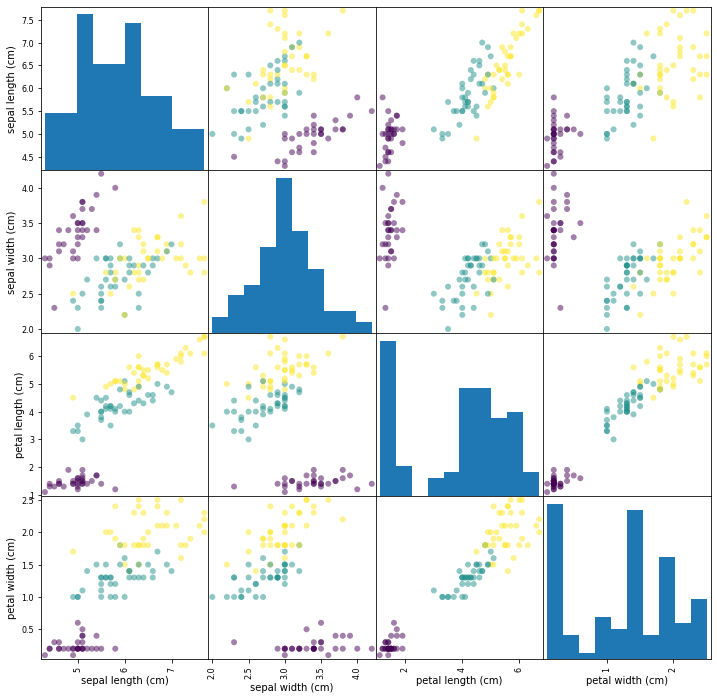

In [10]:
# Plot the data
import pandas as pd
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(12,12), marker="o") # o is marker on graph

วิธีอ่าน Scatterplot matrix มีดังนี้:

Scatterplot matrix แสดงความสัมพันธ์ระหว่างตัวแปรสองตัว ซึ่งอาจจะเป็น Feature ทั้งสองตัว หรืออาจจะเป็น Feature กับ Label ก็ได้ โดยแสดงทุกคู่ความสัมพันธ์ที่เป็นไปได้อยู่ในภาพเดียวกัน เลยมีหน้าตาเป็น Matrix
จะเห็นว่า Matrix ช่องบนซ้ายแทยงลงมาช่องล่างขวา ไม่ได้แสดงเป็น Scatter plot แต่เป็น Distribution plot เพราะมันคือความสัมพันธ์ของตัวมันเอง โดย Distribution plot ก็มีประโยชน์ ทำเราจะได้เห็นว่ารายการข้อมูลทั้งหมดมีการกระจายตัวใน Feature นั้นอย่างไร เช่น ช่อง Sepal width พบว่ามีการกระจายตัวแบบ Normal distribution คือข้อมูลส่วนมากมีค่าอยู่กลางๆ แถวๆ Mean แล้วกระจายตัวออกทั้งด้านลบและด้านบวก
ส่วนช่องอื่นๆ เราสามารถกำหนดให้แยกสีตาม Label ได้ ทำให้เห็นว่าในแต่ละคู่ความสัมพันธ์ ข้อมูล Label ไหนอยู่ตรงไหน ตัวอย่างเช่น คู่ Petal length VS. Sepal length (แถว 3 คอลัมน์ 1) จะเห็นว่า Label แรกจะมี Petal และ Sepal length น้อย, Label ที่สองอยู่ตรงกลางๆ, และ Label ที่สามมีค่ามาก แต่เมื่อดู Sepal width VS. Sepal length (แถว 2 คอลัมน์ 1) พบว่า Label 2 และ 3 มีค่าผสมผสานกัน แยกกจากกันไม่เด็ดขาด เป็นต้น
สำหรับเรา ประโยชน์หนึ่งจากการอ่าน Scatterplot matrix คือการสร้างความเข้าใจในภาพรวมว่าชุดข้อมูลนี้น่าจะ "ยาก" หรือ "ง่าย" ในการสร้างโมเดล โดยถ้าข้อมูลแต่ละ Label แยกจากกันค่อนข้างชัด การสร้างโมเดลก็จะค่อนข้างง่ายและแม่นยำ

In [11]:
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))


Train data accuracy: 0.9523809523809523
Test data accuracy: 1.0


In [13]:
from sklearn.metrics import confusion_matrix
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [14]:
X_test.shape

(45, 4)

In [15]:
# model predictions
predictions = knn_model.predict(X_test)
prob_predictions = knn_model.predict_proba(X_test)
predictions = [iris.target_names[i] for i in predictions]
print("Predicted Probabilities ")
print("------------------------")
print(iris.target_names)
print(prob_predictions) #print prob of testset
print 
# as opposed to actuals
actuals = [iris.target_names[i] for i in y_test]
print("Prediction / Actual")
print("-------------------")
for i in range(len(y_test)):
    print(predictions[i] + " / " + actuals[i])

Predicted Probabilities 
------------------------
['setosa' 'versicolor' 'virginica']
[[0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.6 0.4]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]]
Prediction / Actual
-------------------
versicolor / versicolor
setosa / setosa
virginica / virginica
versicolor / versicolor
versicolor / versicolor
setosa / setosa
versicolor / versicolor
virginica / virginica
versicolor / versicolor
ve

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [17]:
#Setup arrays to store training and test accuracies
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
 

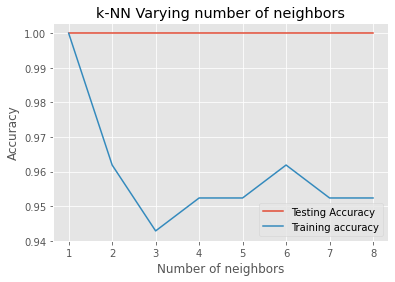

In [18]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Exercise 7.1
ให้นักศึกษาทดลองจำแนกข้อมูล diabetes.csv (โรคเบาหวาน) โดย download ข้อมูลจากเว็บไซต์ https://www.kaggle.com/saurabh00007/diabetescsv/version/1
โดยข้อกำหนดดังต่อไปนี้
1.  explore data เพื่อดูรายละเอียดของข้อมูล และ plot graph 
2.  ทดลองจำแนกข้อมูลโดยใช้ค่า k ตั้งแต่ 1 3 5 7 9  เพื่อหาค่าที่มีประสิทธิภาพที่ดีที่สุด  แล้ว plot graphแสดงผล
3. นำโมเดลที่ได้จากค่า k ที่ดีที่สุดมาแสดงค่าประสิทธิภาพในรูปแบบของ Classification Report ที่แสดง precision recall f-measure 
4. นำโมเดลที่เลือกมาทดลองจำแนกกับชุดข้อมูลใหม่ (ให้หาเอง) ประมาณ 3 ตัวอย่าง แล้วแสดงผลการจำแนกให้ดู

In [ ]:
#เขียน code ตรงนี้นะจ๊ะ